# üñºÔ∏è Diagrams

## PlantUML (iPython)

In [1]:
import iplantuml

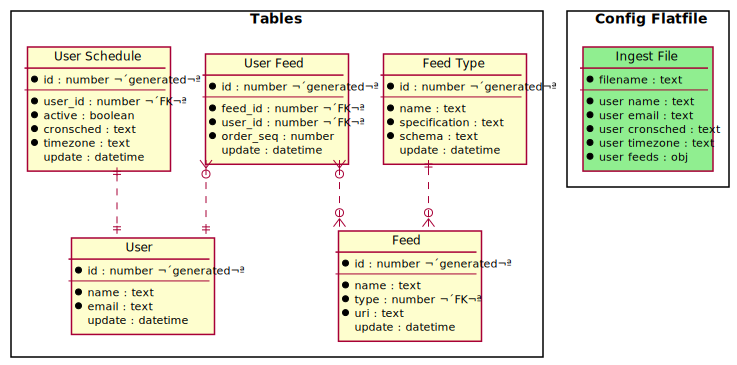

In [2]:
%%plantuml --jar --name sample_database

@startuml
' hide the spot
hide circle

' avoid problems with angled crows feet
skinparam linetype ortho

skinparam packageStyle rectangle

package Tables {
entity "Feed" as feed {
  *id : number <<generated>>
  --
  *name : text
  *type : number <<FK>>
  *uri : text
  update : datetime
}

entity "Feed Type" as feedtype {
  *id : number <<generated>>
  --
  *name : text
  *specification : text
  *schema : text
  update : datetime
}

entity "User Feed" as userfeeds {
  *id : number <<generated>>
  --
  *feed_id : number <<FK>>
  *user_id : number <<FK>>
  *order_seq : number
  update : datetime
}

entity "User" as users {
  *id : number <<generated>>
  --
  *name : text
  *email : text
  update : datetime
}


entity "User Schedule" as usersched {
  *id : number <<generated>>
  --
  *user_id : number <<FK>>
  *active : boolean
  *cronsched : text
  *timezone : text
  update : datetime
}
}

package "Config Flatfile" as flatfile{
entity "Ingest File" as ingest #lightgreen {
  *filename : text
  --
  *user name : text
  *user email : text
  *user cronsched : text
  *user timezone : text
  *user feeds : obj
}
}

feedtype ||..o{ feed
userfeeds }o..o{ feed
userfeeds }o..|| users
usersched ||..|| users
@enduml

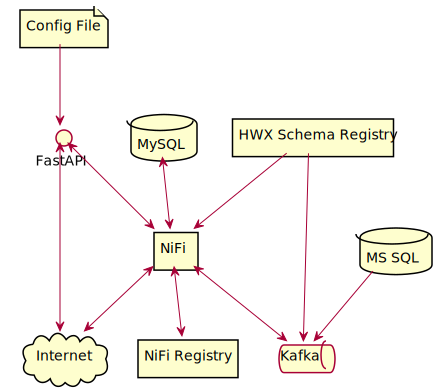

In [3]:
%%plantuml --jar --name sample_deploy

@startuml
file "Config File" as configfile
interface "FastAPI" as fastapi
rectangle "NiFi" as nifi
rectangle "NiFi Registry" as nifireg
rectangle "HWX Schema Registry" as schemareg
queue "Kafka" as kafka
database "MySQL" as mysql
database "MS SQL" as mssql
cloud "Internet" as internet

configfile --> fastapi
fastapi <--> nifi
fastapi <--> internet
nifi <--> nifireg
nifi <--> kafka
nifi <--> internet
schemareg --> nifi
schemareg --> kafka
mssql --> kafka
mysql <--> nifi
@enduml

## Graphviz

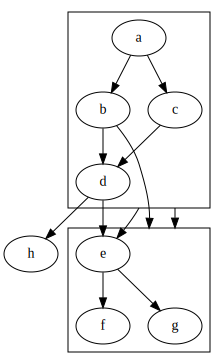

In [4]:
# referece: https://github.com/xflr6/graphviz/blob/master/examples/graphviz-notebook.ipynb
# http://www.graphviz.org/pdf/dotguide.pdf Figure 20

from graphviz import Digraph

g = Digraph("G")
g.attr(compound="true")

with g.subgraph(name="cluster0") as c:
    c.edges(["ab", "ac", "bd", "cd"])

with g.subgraph(name="cluster1") as c:
    c.edges(["eg", "ef"])

g.edge("b", "f", lhead="cluster1")
g.edge("d", "e")
g.edge("c", "g", ltail="cluster0", lhead="cluster1")
g.edge("c", "e", ltail="cluster0")
g.edge("d", "h")

g

## mingrammer/diagrams

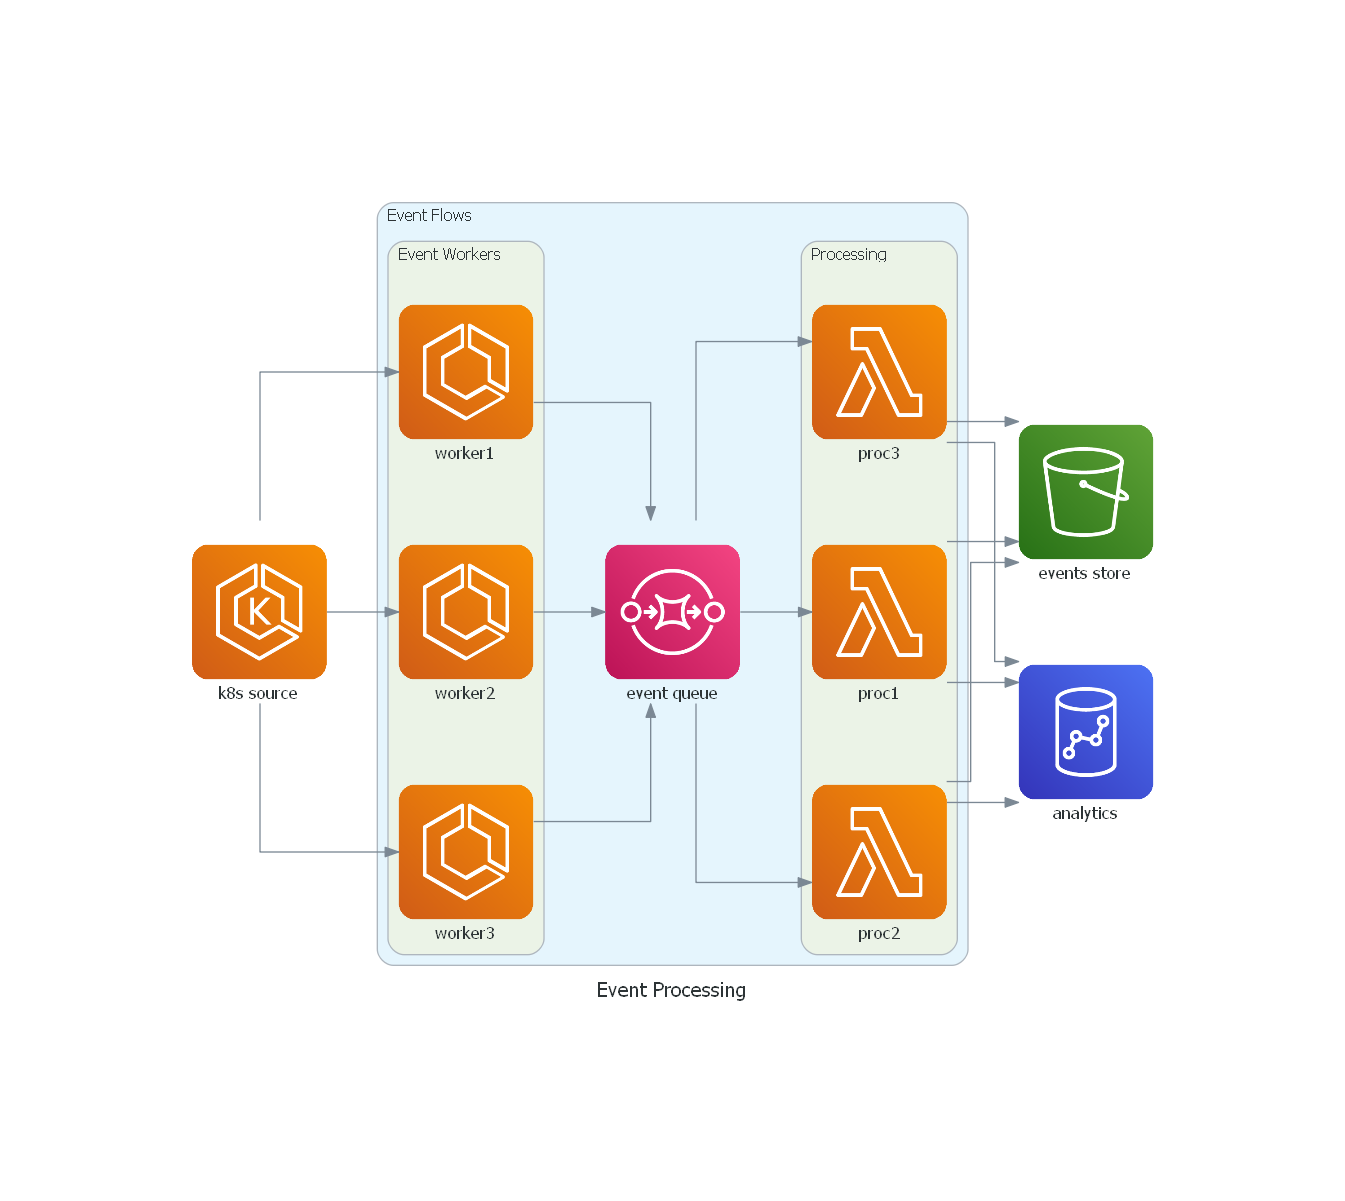

In [5]:
# reference: https://diagrams.mingrammer.com/docs/getting-started/examples

from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS, EKS, Lambda
from diagrams.aws.database import Redshift
from diagrams.aws.integration import SQS
from diagrams.aws.storage import S3

with Diagram("Event Processing", show=False) as diag:
    source = EKS("k8s source")

    with Cluster("Event Flows"):
        with Cluster("Event Workers"):
            workers = [ECS("worker1"), ECS("worker2"), ECS("worker3")]

        queue = SQS("event queue")

        with Cluster("Processing"):
            handlers = [Lambda("proc1"), Lambda("proc2"), Lambda("proc3")]

    store = S3("events store")
    dw = Redshift("analytics")

    source >> workers >> queue >> handlers
    handlers >> store
    handlers >> dw

diag

## Kroki (Remote)

In [6]:
import base64
import sys
import zlib

import requests
from IPython.display import SVG

kroki_host = "https://kroki.io"

In [7]:
puml = b"""
start
:Hello world;
:This is defined on
several **lines**;
stop
"""

In [8]:
encoded_diag = base64.urlsafe_b64encode(zlib.compress(puml, 9))
encoded_diag.decode("utf-8")

'eNrjKi5JLCrhsvJIzcnJVyjPL8pJseayCsnILFYAopTUtMy81BSF_Dyu4tSy1KLEHAUtrRygULGWljVXcUl-ARcA1UwVrA=='

In [9]:
result = requests.get(
    "{}/plantuml/svg/{}".format(kroki_host, encoded_diag.decode("utf-8"))
)
result

<Response [200]>

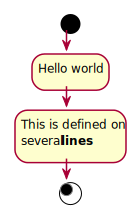

In [10]:
SVG(result.content)

In [11]:
erd = """[Person] {bgcolor: "#ececfc"}
*name
height
weight
+birth_location_id

[Location] {bgcolor: "#d0e0d0"}
*id
city
state
country

Person *--1 Location
"""

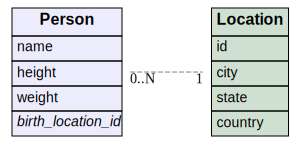

In [12]:
data = {
    "diagram_source": erd,
    "diagram_type": "erd",
    "output_format": "svg",
}
result = requests.post(kroki_host, json=data)
SVG(result.content)

## Kroki (Local JAR)

In [13]:
import base64
import os
import subprocess
import sys
import zlib

import psutil
import requests
from IPython.display import SVG

kroki_jar = (
    "https://github.com/yuzutech/kroki/releases/download/v0.7.1/kroki-server-0.7.1.jar"
)
kroki_host = "http://localhost:8000"

In [14]:
# download the jar if not already available
kroki_jar_filepath = "{}/{}".format(os.getcwd(), os.path.basename(kroki_jar))
if not os.path.isfile(kroki_jar_filepath):
    result = requests.get(kroki_jar)
    with open(kroki_jar_filepath, "wb") as f:
        f.write(result.content)

In [15]:
# run the jar
kroki_proc = subprocess.Popen(["java", "-jar", kroki_jar_filepath])
print("kroki host process started with pid: {}".format(kroki_proc.pid))
print("kroki pid exists: {}".format(psutil.pid_exists(kroki_proc.pid)))

kroki host process started with pid: 13748
kroki pid exists: True


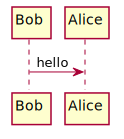

In [16]:
data = {
    "diagram_source": "Bob -> Alice : hello",
    "diagram_type": "plantuml",
    "output_format": "svg",
}
result = requests.post(kroki_host, json=data)
SVG(result.content)

In [17]:
# kill the kroki subprocess
proc_killed = kroki_proc.kill()

In [19]:
print("kroki pid exists: {}".format(psutil.pid_exists(kroki_proc.pid)))

kroki pid exists: False
